# 20181776 소재휘

### Pyspark 환경 설정과 데이터분석 입문

In [12]:
import pyspark

In [13]:
print("Success")

Success


In [14]:
!java -version

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment AdoptOpenJDK-11.0.11+9 (build 11.0.11+9)
OpenJDK 64-Bit Server VM AdoptOpenJDK-11.0.11+9 (build 11.0.11+9, mixed mode)


In [15]:
import sys
print(sys.executable)
print(sys.version)

/Users/sojaehwi/opt/anaconda3/bin/python
3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]


In [17]:
import os
print(os.environ['PYSPARK_PYTHON']==sys.executable)
print(os.environ['PYSPARK_DRIVER_PYTHON']==sys.executable)
os.environ['PYSPARK_PYTHON']=sys.executable
os.environ['PYSPARK_DRIVER_PYTHON']=sys.executable


True
True


### 모듈이 설치된 곳 확인

In [18]:
import site
sys.path  #모듈이 설치된 곳

['/Users/sojaehwi/Documents/GitHub/LECTURE_Bigdata',
 '/Users/sojaehwi/opt/anaconda3/lib/python39.zip',
 '/Users/sojaehwi/opt/anaconda3/lib/python3.9',
 '/Users/sojaehwi/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/sojaehwi/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/sojaehwi/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/sojaehwi/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions',
 '/Users/sojaehwi/.ipython']

In [21]:
sparkHome=sys.path[6]

In [22]:
f"SPARK_HOME: {sparkHome}\pyspark"    #printf보다 간편한 fstring

'SPARK_HOME: /Users/sojaehwi/opt/anaconda3/lib/python3.9/site-packages/aeosa\\pyspark'

In [ ]:
# 스파크 실행방식 : Batch : 일괄 실행(여러 명령어를 묶어서), interactive : 대화식. 우리는 Interactive로 한다.

In [24]:
home=os.path.expanduser('~') #home = 루트경로

In [26]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/15 16:48:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [27]:
spark.version

'3.4.1'

In [28]:
sent = u"""진동벨 좀 만들었으면 좋겠다 2층 매장이라 결국 손님 어딨는지는 몰라서 그저 열심히 목터져가며 소리지르는게 전부임 넘 안쓰럽다 그리고 픽업 장소 옆은 시장통임 북적북적
옆 동네 스타벅스 왔다,,, 무려 노트북 들고,,,,!
스타벅스 있다가 나오면 머리카락 커피향기 배는데 안에 있을 땐 모르겠다가 밖에 나와서 머리카락 흔들릴 때마다 느껴지는 거 너무 좋아
저도...마싯는 커피 마시고 싶어여...훌젹 ㅋㅋㅋ 막 요즘 로스팅 전문 하는 데 가서 마시구 싶고 그러네요 근데 어떤데 있는질 몰라서... 합정 상수 부근 쪽 찾아볼가여?
예전에는 스타벅스 비싸다는 인식 있었는데 카페 가격 다 똑같은듯
저도 그렇게 섬세한 입맛 아니라서 ㅋㅋ 가격 맛 찾아낼 수 있을지는 의문이네요...ㅋㅋㅋ 평범한  곳 가도 갠찬아여! 엄청 맛 없는 것만 아니라면야 ㅋㅋㅋ"""

for c in sent.split():
    print(c, end=" ")

진동벨 좀 만들었으면 좋겠다 2층 매장이라 결국 손님 어딨는지는 몰라서 그저 열심히 목터져가며 소리지르는게 전부임 넘 안쓰럽다 그리고 픽업 장소 옆은 시장통임 북적북적 옆 동네 스타벅스 왔다,,, 무려 노트북 들고,,,,! 스타벅스 있다가 나오면 머리카락 커피향기 배는데 안에 있을 땐 모르겠다가 밖에 나와서 머리카락 흔들릴 때마다 느껴지는 거 너무 좋아 저도...마싯는 커피 마시고 싶어여...훌젹 ㅋㅋㅋ 막 요즘 로스팅 전문 하는 데 가서 마시구 싶고 그러네요 근데 어떤데 있는질 몰라서... 합정 상수 부근 쪽 찾아볼가여? 예전에는 스타벅스 비싸다는 인식 있었는데 카페 가격 다 똑같은듯 저도 그렇게 섬세한 입맛 아니라서 ㅋㅋ 가격 맛 찾아낼 수 있을지는 의문이네요...ㅋㅋㅋ 평범한 곳 가도 갠찬아여! 엄청 맛 없는 것만 아니라면야 ㅋㅋㅋ 

In [29]:
d = dict()
for c in sent.split():
    if c not in d:
        d[c]=1
    else:
        d[c]=d[c]+1

In [42]:
# 두 번 이상 등장한 단어만
d1 = dict()
for key, value in d.items():
    if value>1:
        d1[key]=value
        print(key, value)

스타벅스 3
머리카락 2
ㅋㅋㅋ 2
가격 2
맛 2


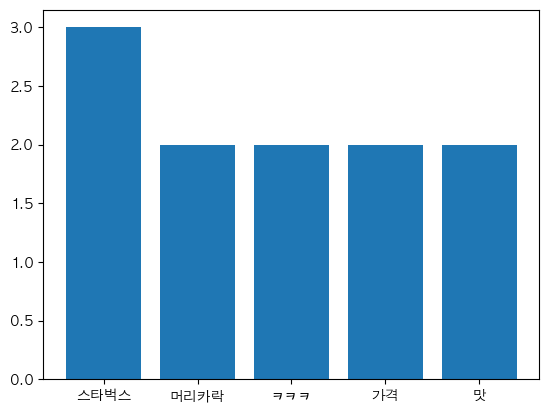

In [41]:
%matplotlib inline # %:jupter notebook에서 제공. 그래프를 연달아 제공.

import matplotlib # 아나콘다를 설치하면 기본 제공
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "AppleGothic"
#plt.rc('font', family='Malgun Gothic')
plt.bar(range(len(d1)), d1.values(), align='center')
plt.xticks(range(len(d1)), list(d1.keys()))
plt.show()

In [43]:
%%writefile src/ds1_1_wordcount.py
import matplotlib
import matplotlib.pyplot as plt 

sent = u"""진동벨 좀 만들었으면 좋겠다 2층 매장이라 결국 손님 어딨는지는 몰라서 그저 열심히 목터져가며 소리지르는게 전부임 넘 안쓰럽다 그리고 픽업 장소 옆은 시장통임 북적북적
옆 동네 스타벅스 왔다,,, 무려 노트북 들고,,,,!
스타벅스 있다가 나오면 머리카락 커피향기 배는데 안에 있을 땐 모르겠다가 밖에 나와서 머리카락 흔들릴 때마다 느껴지는 거 너무 좋아
저도...마싯는 커피 마시고 싶어여...훌젹 ㅋㅋㅋ 막 요즘 로스팅 전문 하는 데 가서 마시구 싶고 그러네요 근데 어떤데 있는질 몰라서... 합정 상수 부근 쪽 찾아볼가여?
예전에는 스타벅스 비싸다는 인식 있었는데 카페 가격 다 똑같은듯
저도 그렇게 섬세한 입맛 아니라서 ㅋㅋ 가격 맛 찾아낼 수 있을지는 의문이네요...ㅋㅋㅋ 평범한  곳 가도 갠찬아여! 엄청 맛 없는 것만 아니라면야 ㅋㅋㅋ"""

def do():
    d = dict()
    for c in sent.split():
        if c not in d:
            d[c]=1
        else:
            d[c]=d[c]+1
    d1 = dict()
    for key, value in d.items():
        if value>1:
            d1[key]=value
            print(key, value)
    plt.bar(range(len(d1)), d1.values(), align='center')
    plt.xticks(range(len(d1)), list(d1.keys()))
    plt.show()

def main():
    do()

if __name__=="__main__":
    main()

Writing src/ds1_1_wordcount.py
